<a href="https://colab.research.google.com/github/sergiomath/dataScience/blob/main/Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from graphviz  import Source

In [35]:
##Importamos desde github

df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")

In [36]:
###Quitamos ceros de las columnas por su media o su mediana(imputacion de datos BASICA) #####

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean()) ##Remmplazamos los 0 en glucosa por la media 

df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean()) ##reemplazamos con la media

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())##reemplazamos con la mediana

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())##reemplazamos con la mediana

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())##reemplazamos con la mediana

In [37]:
colnames=df.columns.values.tolist()
colnames
predictores=colnames[:8]
objetivo=colnames[8]

In [38]:
###### particionado del dataset######
df['is_train']=np.random.uniform(0,1,len(df))<=0.75
train,test=df[df['is_train']==True],df[df['is_train']==False]

In [39]:
Entre_val, prueba, Entre_val_clase, prueba_clase = train_test_split(
    df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]],
    df[["Outcome"]],
    test_size= 0.25,
    random_state= 4
)

In [40]:
arbol=DecisionTreeClassifier(criterion='entropy',random_state=99,min_samples_leaf=6,max_depth=6)
arbol.fit(train[predictores],train[objetivo]) 

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=99)

In [41]:
predicciones=arbol.predict(test[predictores])

In [42]:
pd.crosstab(test[objetivo],predicciones,rownames=['Actual'],colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,96,28
1,18,48


In [43]:
### Visualizacion del arbol ####
with open('diabetes.dot','w') as dotfile :
   export_graphviz(arbol,out_file=dotfile,feature_names=predictores)
   dotfile.close()

In [44]:
file=open('diabetes.dot','r')
text=file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Glucose <= 110.5\\nentropy = 0.934\\nsamples = 578\\nvalue = [376, 202]"] ;\n1 [label="Pregnancies <= 6.5\\nentropy = 0.542\\nsamples = 241\\nvalue = [211, 30]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="BMI <= 33.55\\nentropy = 0.402\\nsamples = 200\\nvalue = [184, 16]"] ;\n1 -> 2 ;\n3 [label="DiabetesPedigreeFunction <= 0.672\\nentropy = 0.221\\nsamples = 141\\nvalue = [136, 5]"] ;\n2 -> 3 ;\n4 [label="BloodPressure <= 51.0\\nentropy = 0.071\\nsamples = 117\\nvalue = [116, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.65\\nsamples = 6\\nvalue = [5, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 111\\nvalue = [111, 0]"] ;\n4 -> 6 ;\n7 [label="BloodPressure <= 73.0\\nentropy = 0.65\\nsamples = 24\\nvalue = [20, 4]"] ;\n3 -> 7 ;\n8 [label="Pregnancies <= 2.5\\nentropy = 0.31\\nsamples = 18\\nvalue = [17, 1]"] ;\n7 -> 8 ;\n9 [label="entropy = 0.0\\nsample

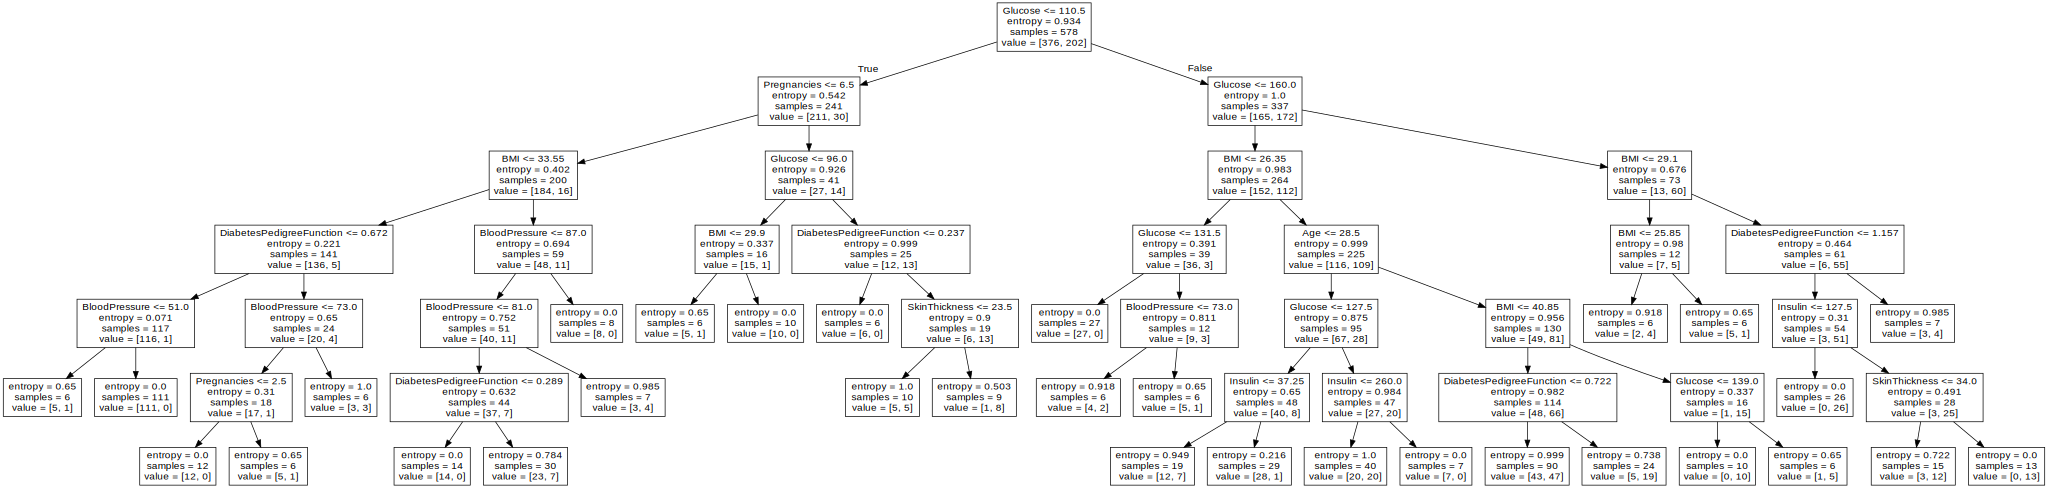

In [45]:
Source(text)

In [21]:
###Cross Validation 
X=df[predictores]
Y=df[objetivo]
arbol=DecisionTreeClassifier(criterion='entropy',random_state=99,min_samples_leaf=6,max_depth=6)
arbol.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=99)

In [22]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)

In [25]:
score=np.mean(cross_val_score(arbol,X,Y,scoring='accuracy',cv=cv,n_jobs=1))
score

0.7356117566643883

In [49]:
print(predictores)
for i in range(1,11):
  arbol=DecisionTreeClassifier(criterion='entropy',random_state=99,min_samples_leaf=6,max_depth=i)
  arbol.fit(X,Y)
  cv=KFold(n_splits=10,random_state=1,shuffle=True)
  score=np.mean(cross_val_score(arbol,X,Y,scoring='accuracy',cv=cv,n_jobs=1))
  print('Score para i =',i,' es de ', score)
  print('   ',arbol.feature_importances_)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Score para i = 1  es de  0.7225393028024608
    [0. 1. 0. 0. 0. 0. 0. 0.]
Score para i = 2  es de  0.7485475051264525
    [0.         0.60945904 0.         0.         0.         0.39054096
 0.         0.        ]
Score para i = 3  es de  0.7459842788790157
    [0.         0.55928824 0.         0.         0.         0.29334802
 0.01237407 0.13498967]
Score para i = 4  es de  0.7407552973342447
    [0.         0.53313329 0.         0.         0.01443529 0.29689806
 0.01042514 0.14510822]
Score para i = 5  es de  0.7407723855092276
    [0.         0.45767636 0.04065156 0.         0.04236134 0.25487665
 0.07986373 0.12457036]
Score para i = 6  es de  0.7356117566643883
    [0.01797096 0.4049784  0.04634547 0.         0.03223262 0.27599538
 0.11478855 0.10768861]
Score para i = 7  es de  0.7422077922077922
    [0.0423709  0.37008522 0.06359937 0.         0.03215069 0.24261953
 0